# Linear Classifier (선형분류)

- 계산한 값이 0보다 작은 클래스는 -1, 0보다 크면 +1이라고 예측(분류)
> ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b > 0 <br>
> Linear Regression와 매우 비슷하지만 가중치(w) 합을 사용하는 대신 예측한 값을 임계치 0 과 비교

- 이진 선형 분류기는 선, 평면, 초평면을 이용하여 2개의 클래스를 구분하는 분류기


경사하강법(Gradient Descent) 최적화 알고리즘을 사용하여 선형 모델을 작성

[SGDClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

```
SGDClassifier(alpha, average, class_weight, epsilon, eta0, fit_intercept, l1_ratio, learning_rat, loss, max_iter, n_iter, n_jobs, penalty, power_t, random_state, shuffle, tol, verbose, warm_start)
```
확률적 경사하강법(SGD, Stochastic Gradient Descent)을 이용하여 선형모델을 구현

- lossstr : 손실함수 (default='hinge')
- penalty : {'l2', 'l1', 'elasticnet'}, default='l2'
- alpha : 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
- l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default=True)
- max_iter : 계산에 사용할 작업 수 (default=1000)
- tol : 정밀도
- shuffle : 에포크 후에 트레이닝 데이터를 섞는 유무 (default=True)
- epsilon : 손실 함수에서의 엡실론, 엡실론이 작은 경우, 현재 예측과 올바른 레이블 간의 차이가 임계 값보다 작으면 무시 (default=0.1)
- n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수
- random_state : 난수 seed 설정
- learning_rate : 학습속도 (default='optimal')
- eta0 : 초기 학습속도 (default=0.0)
- power_t : 역 스케일링 학습률 (default=0.5)
- early_stopping : 유효성 검사 점수가 향상되지 않을 때 조기 중지여부 (default=False)
- validation_fraction : 조기 중지를위한 검증 세트로 설정할 교육 데이터의 비율 (default=0.1)
- n_iter_no_change : 조기중지 전 반복횟수 (default=5)
- class_weight : 클래스와 관련된 가중치 {class_label: weight} or “balanced”, default=None
- warm_start : 초기화 유무 (default=False)
- average : True로 설정하면 모든 업데이트에 대한 평균 SGD 가중치를 계산하고 결과를 coef_속성에 저장 (default=False)


#### LinearClassifier 실습 01

붓꽃 데이터 셋에 선형분류 적용

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.data.shape
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X = iris.data
y = iris.target

In [ ]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X2 = X[:, :2] # 꽃받침의 길이와 넓이
X2[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [ ]:
X2.shape

(150, 2)

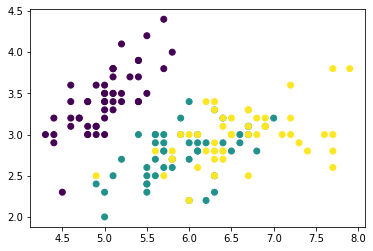

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X2[:, 0], X2[:, 1], c=y)
plt.show()

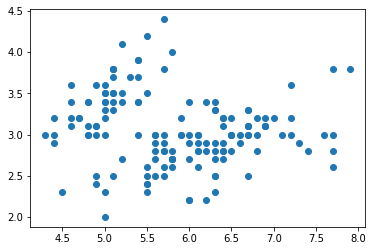

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.show()

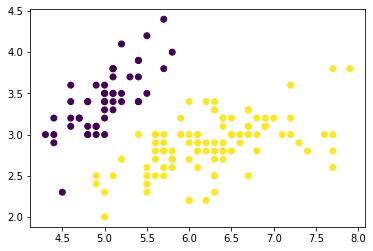

In [ ]:
y2 = y.copy()
#원본 y는 그대로 놔둠 = 손상시키지 않음.
y2[ y2 == 2 ] = 1
#y2는 0과 1로만 바뀌게 됨.
plt.scatter(X2[:, 0], X2[:, 1], c=y2)
plt.show()

In [ ]:
#내가 이해한부분 C는 y를 참조했는데
#C 는 마커 색상이라고 함
#y 는 3개의 값을 가진 0,1,2 리스트이고
#scatter와 inline을 통해 y를 마커색으로 구분짓게 만드는 것같음

#예시로 y2를 잡고 0,1,2에서 2값을 1로 바꾸었을 때에는
#예시 2그림처럼 색이 2개로밖에 변하지 않음.

주피터 노트북에서 파이썬 코드를 실행할 때 %matplotlib inline를 써야할 때가 있는데, 

이는 주피터 노트북을 실행한 브라우저에서 바로 그림을 볼 수 있게끔 만드는 것.

즉, 브라우저 내부(inline)에 바로 그려지도록 해주는 코드이다.


In [ ]:
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, 
                                                    test_size=0.5,
                                                    random_state=0)

#테스트는 절반만, 데이터가 적으니까, 그리고 값이 어떻게 나오는지 한 번 보자구

In [ ]:
X_train.shape

(75, 2)

In [ ]:
X_train[:5]

array([[4.6, 3.1],
       [5.9, 3. ],
       [5.1, 2.5],
       [4.6, 3.4],
       [6.2, 2.2]])

In [ ]:
from sklearn.linear_model import SGDClassifier
#확률적 경사하강법을 이용해서 값을 구하는 모델
#경사하강법 최적화 알고리즘을 사용하여 선형 모델을 작성하는 방법이 SGDClassifier임

model = SGDClassifier(max_iter=1000, random_state=0)
#max_이터레이터 = 1000으로 되어있음.
#할 때마다 값이 바뀌니까, 랜덤스테이트 0으로 고정하면
#매번 같은 선이 나옴
model.fit(X_train, y_train)
model.coef_, model.intercept_
#x값이 두개였으니까 2개 나옴
#intercept는 편향잉가!

(array([[ 107.75047259, -153.43415249]]), array([-96.16214183]))

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9866666666666667, 1.0)

In [ ]:
print(model.coef_)
print(model.coef_[0,0])
print(model.coef_[0,1])

[[ 107.75047259 -153.43415249]]
107.75047258979163
-153.43415248897236


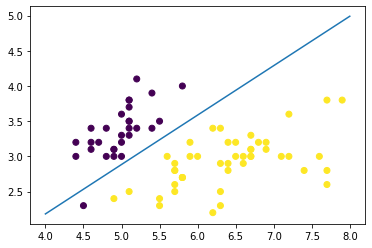

[4.         4.08163265 4.16326531 4.24489796 4.32653061 4.40816327
 4.48979592 4.57142857 4.65306122 4.73469388 4.81632653 4.89795918
 4.97959184 5.06122449 5.14285714 5.2244898  5.30612245 5.3877551
 5.46938776 5.55102041 5.63265306 5.71428571 5.79591837 5.87755102
 5.95918367 6.04081633 6.12244898 6.20408163 6.28571429 6.36734694
 6.44897959 6.53061224 6.6122449  6.69387755 6.7755102  6.85714286
 6.93877551 7.02040816 7.10204082 7.18367347 7.26530612 7.34693878
 7.42857143 7.51020408 7.59183673 7.67346939 7.75510204 7.83673469
 7.91836735 8.        ]
[2.18230259 2.23962983 2.29695708 2.35428432 2.41161156 2.46893881
 2.52626605 2.58359329 2.64092054 2.69824778 2.75557502 2.81290226
 2.87022951 2.92755675 2.98488399 3.04221124 3.09953848 3.15686572
 3.21419297 3.27152021 3.32884745 3.38617469 3.44350194 3.50082918
 3.55815642 3.61548367 3.67281091 3.73013815 3.7874654  3.84479264
 3.90211988 3.95944712 4.01677437 4.07410161 4.13142885 4.1887561
 4.24608334 4.30341058 4.36073783 4.4180

In [ ]:
#선그리기 한 번 해보자

import numpy as np

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
w0 = model.coef_[0, 0]
w1 = model.coef_[0, 1]
b = model.intercept_
x0 = np.linspace(4, 8, 50)
x1 = -(w0 * x0 + b) / w1

#y값이 0이면 무쓸모니까
#x0*w0 + x1*w1 +b 로 y값을 구해줘야 하는데,
#x0을 y값으로 잡고 linspace를 써서 구해주고
#연산 시작!

#y = x0*w0 + x1*w1 +b 이고 y를 0으로 두면 쓸모없기 때문에

#x1을 y값으로, x0을 x값으로 잡고 계산을 해보았을때

#x1*w1 = -(x0 * w0 + b)이고

#x1 = -(x0 * w0 + b) / w1이 되는 것임, 그렇게 y값을 구해서!

#x 값은 x0이고!

#plot(x축, y축 잡고)

plt.plot(xx0, xx1)
plt.show()
print(xx0)
print(xx1)
#4부터 8사이에 숫자 50개 만들어 준거 같음
#이유는 선 그려보려고

In [ ]:
y_train

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0])

#x=np.linspace(start,stop,num) 

star배열의 시작값, stop은 배열의 끝값, num은 start와 stop사이 몇개의 일정한 간격으로 요소를 만들 것인지 나타내는것


#### 4개 속성 모두 이용

세가지 꽃 구분

In [ ]:
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=0)
model = SGDClassifier(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.7619047619047619, 0.6666666666666666)

In [ ]:
X.shape

(150, 4)

In [ ]:
X_test.shape

(45, 4)

In [ ]:
X_train.shape

(105, 4)

In [ ]:
y_test.shape

(45,)

In [ ]:
y_train.shape

(105,)

In [ ]:
150 *0.3

45.0

In [ ]:
150*0.7

105.0

In [ ]:
model.coef_, model.intercept_

(array([[   6.92041522,   28.83506344,  -34.02537486,  -14.99423299],
        [  21.50537634,  -98.79032258,   24.64157706,  -96.99820789],
        [-110.42765085,  -78.79320445,  165.78793204,  145.57703574]]),
 array([   9.95304754,  111.13821101, -117.26491128]))

In [ ]:
#나만의 생각

#가중치 12개랑 편향값 3개를 이용해서 또 뭘 만들어 볼 수 있지 않을까?

#plt그림이라던가
#신경망.

#그림은 차원이 너무 높아져서 어려울 수 있지만
#신경망은 여러 변수들을 가지고 만들어 보는 거라 충분히 가능하다함! 여유로울 때 도저어어언!
